<a href="https://colab.research.google.com/github/adeliaramp/Early-Stage-Diabetes-Risk-Prediction/blob/main/Diabetes_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages and libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [2]:
#Upload the data to google.colab system
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [3]:
# Load the diabetes data
data = pd.read_csv('diabetes_data_upload.csv')

# Quick preview of the data
print("Dataset Overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nClass Distribution:")
print(data['class'].value_counts())

Dataset Overview:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No     

<ipython-input-4-da8e63c78328>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='Set2')


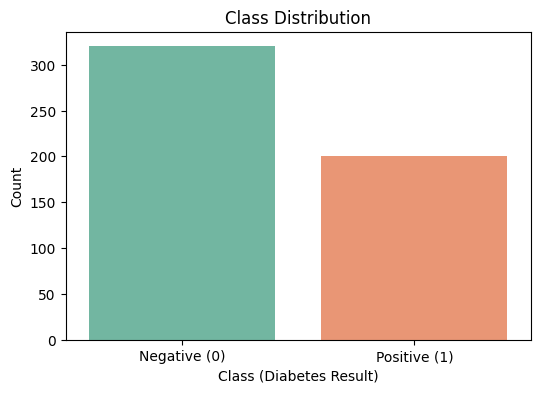

In [4]:
# Visualize Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class (Diabetes Result)")
plt.xticks([0, 1], ["Negative (0)", "Positive (1)"])
plt.ylabel("Count")
plt.show()

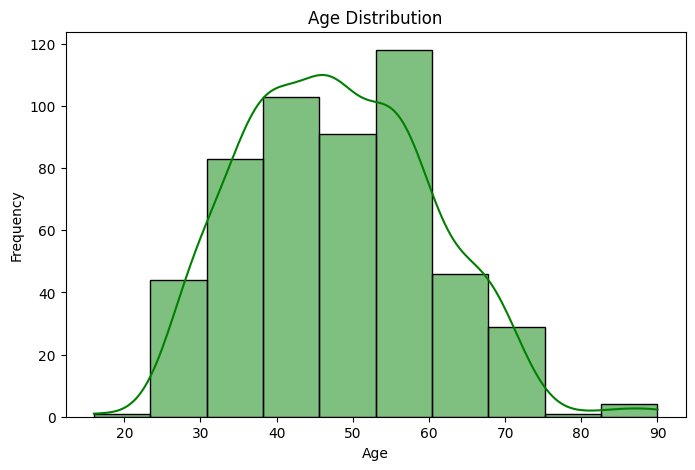

In [5]:
# Visualize Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='Green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<ipython-input-6-bc9da52f76a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


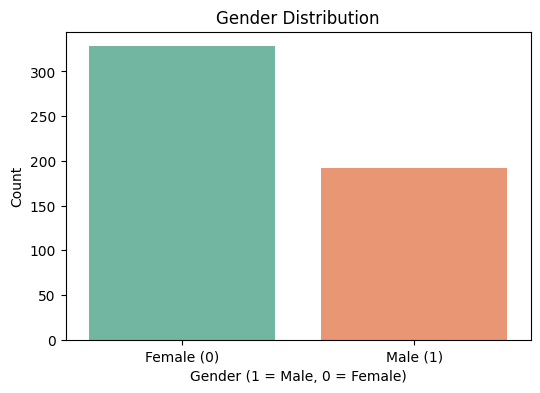

In [6]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Female (0)", "Male (1)"])
plt.show()


<Figure size 1200x800 with 0 Axes>

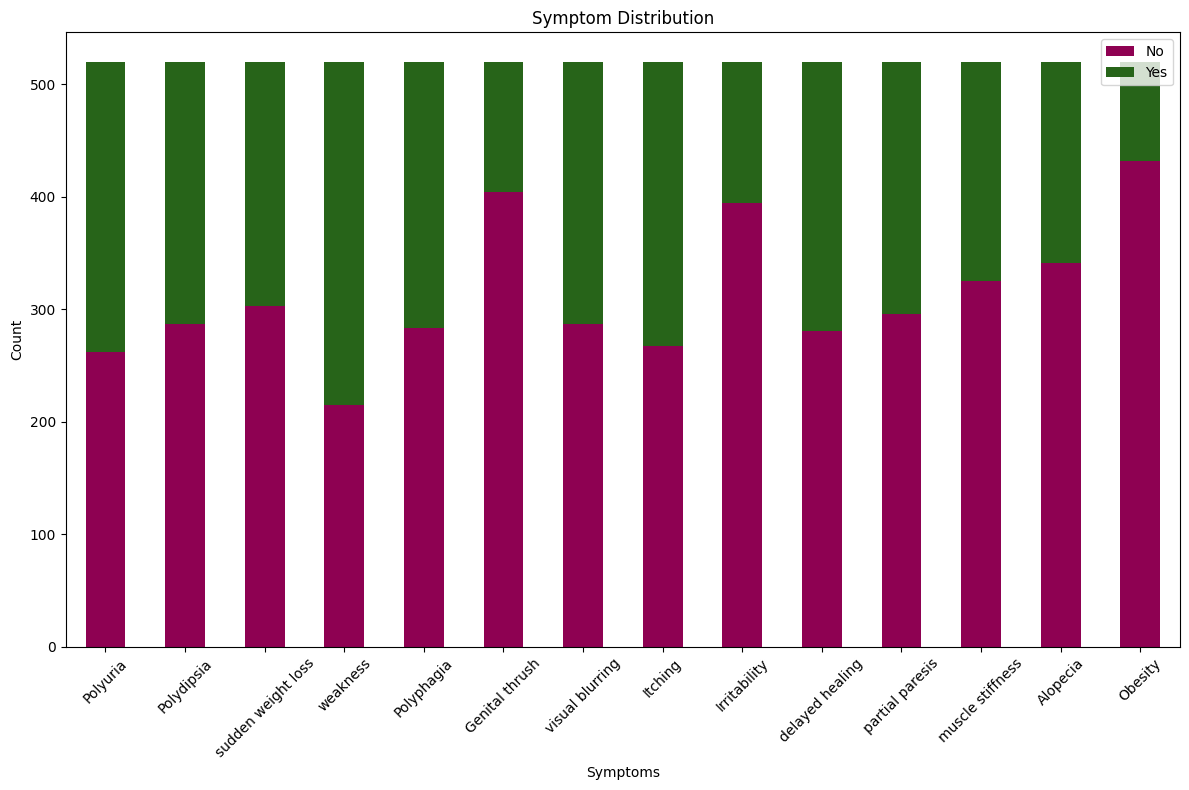

In [7]:
# Distribution of Symptoms
symptoms = data.columns[2:-1]  # Select only symptom columns (excluding 'Age', 'Gender', 'class')
plt.figure(figsize=(12, 8))
symptom_counts = data[symptoms].apply(lambda x: x.value_counts()).T  # Count Yes/No for each symptom
symptom_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='PiYG')
plt.title("Symptom Distribution")
plt.ylabel("Count")
plt.xlabel("Symptoms")
plt.xticks(rotation=45)
plt.legend(["No", "Yes"])
plt.tight_layout()
plt.show()

In [9]:
# Data Preprocessing
# Encode categorical variables (Gender -> 0/1, Yes/No -> 1/0)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Encode Gender
for col in symptoms:
    data[col] = data[col].map({'Yes': 1, 'No': 0})  # Map Yes/No to 1/0
data['class'] = le.fit_transform(data['class'])  # Encode 'class' (Positive/Negative)

# Split data into features (X) and target (y)
X = data.drop(columns=['class'])
y = data['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Model Building
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



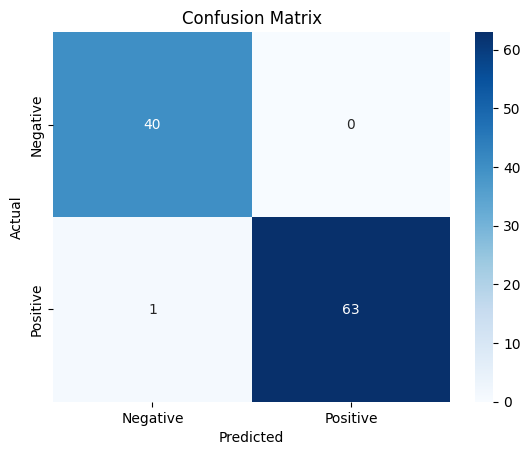

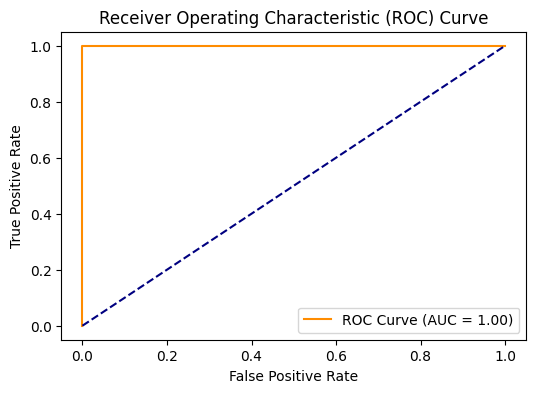

In [11]:
# Model Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ROC Curve
# Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

<ipython-input-12-58b6587ddabb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


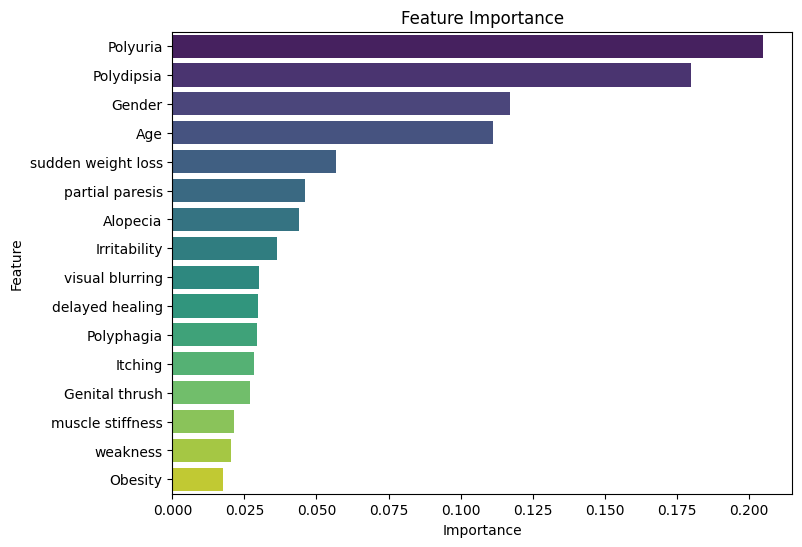

In [12]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [13]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.95192308 0.99038462 0.93269231 1.         1.        ]
Mean Cross-Validation Accuracy: 0.975
